In [ ]:
#This program is to develop a neural Network(ANN) regression model . redshift the label/target
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import  MinMaxScaler

import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/train_all_range.csv")

In [ ]:
dataset.shape

(604935, 28)

In [ ]:
dataset.duplicated().sum()

8604

In [ ]:
dataset.drop_duplicates()

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz,redshift
0,1.240000e+18,22.70128,21.55564,20.74338,19.97239,19.65203,23.26064,22.38317,21.52284,20.75258,...,0.000121,22.128460,21.149510,20.357885,19.812210,22.821905,21.953005,21.137710,20.602890,0.679974
1,1.240000e+18,23.23910,21.44343,19.67306,18.94400,18.55688,23.69614,22.34922,20.59603,19.86871,...,0.000114,22.341265,20.558245,19.308530,18.750440,23.022680,21.472625,20.232370,19.659590,0.412071
2,1.240000e+18,24.05348,21.24721,19.39289,18.68024,18.31429,24.11929,22.13657,20.29977,19.57731,...,0.000068,22.650345,20.320050,19.036565,18.497265,23.127930,21.218170,19.938540,19.384555,0.413140
3,1.240000e+18,26.32478,20.74059,18.99681,18.29084,17.80812,25.19303,21.98622,20.28767,19.56692,...,0.000078,23.532685,19.868700,18.643825,18.049480,23.589625,21.136945,19.927295,19.318555,0.399193
4,1.240000e+18,24.76801,19.32076,17.81846,17.23835,16.92202,24.11602,20.81318,19.32606,18.72738,...,0.000034,22.044385,18.569610,17.528405,17.080185,22.464600,20.069620,19.026720,18.568060,0.253831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604930,1.240000e+18,23.95901,21.45168,20.99064,20.83455,20.90097,24.58145,21.84688,21.45192,21.29986,...,0.008792,22.705345,21.221160,20.912595,20.867760,23.214165,21.649400,21.375890,21.362660,6.911286
604931,1.240000e+18,26.08886,22.08654,21.42736,21.39464,21.62726,25.44403,22.58780,21.98829,21.84853,...,0.001358,24.087700,21.756950,21.411000,21.510950,24.015915,22.288045,21.918410,21.963385,5.464636
604932,1.240000e+18,24.30561,23.59575,21.74487,20.60606,19.91005,24.03291,24.07756,22.41889,21.23574,...,0.001004,23.950680,22.670310,21.175465,20.258055,24.055235,23.248225,21.827315,20.866255,5.350088
604933,1.240000e+18,25.70489,22.18283,21.30940,20.22876,19.21709,23.99918,23.17838,22.30052,21.11168,...,0.000015,23.943860,21.746115,20.769080,19.722925,23.588780,22.739450,21.706100,20.624625,6.964785


In [ ]:
#these columns are not required
dataset.drop(['objid'], axis = 1,inplace=True) #dropping objid column
dataset.drop(['zerr'], axis = 1,inplace=True) #dropping zerr column

In [ ]:
dataset[dataset["modelMag_u"]==-9999]=np.nan
dataset[dataset["modelMag_g"]==-9999]=np.nan
dataset[dataset["modelMag_r"]==-9999]=np.nan
dataset[dataset["modelMag_i"]==-9999]=np.nan
dataset[dataset["modelMag_z"]==-9999]=np.nan
dataset[dataset["fiberMag_u"]==-9999]=np.nan
dataset[dataset["fiberMag_g"]==-9999]=np.nan
dataset[dataset["fiberMag_r"]==-9999]=np.nan
dataset[dataset["fiberMag_i"]==-9999]=np.nan
dataset[dataset["fiberMag_z"]==-9999]=np.nan
dataset[dataset["petroR50_r"]==-9999]=np.nan
dataset[dataset["petroR90_r"]==-9999]=np.nan
dataset[dataset["petroR50_z"]==-9999]=np.nan
dataset[dataset["petroR90_z"]==-9999]=np.nan
dataset[dataset["mmug"]==-9999]=np.nan
dataset[dataset["mmgr"]==-9999]=np.nan
dataset[dataset["mmri"]==-9999]=np.nan
dataset[dataset["mmiz"]==-9999]=np.nan
dataset[dataset["mfug"]==-9999]=np.nan
dataset[dataset["mfgr"]==-9999]=np.nan
dataset[dataset["mfri"]==-9999]=np.nan
dataset[dataset["mfiz"]==-9999]=np.nan
dataset[dataset["r"]==-9999]=np.nan
dataset[dataset["i"]==-9999]=np.nan
dataset[dataset["z"]==-9999]=np.nan
dataset[dataset["redshift"]==-9999]=np.nan
dataset[dataset["redshift"]<0]=np.nan

In [ ]:
#Dropping null values
dataset=dataset.dropna()
dataset.shape

(592312, 26)

Text(0, 0.5, 'Number of samples')

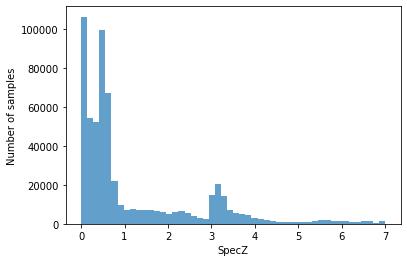

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
def getClass(value):
  if value>=0.00 and value<1.0:
    return '1'
  elif value>=1.00 and value<2.0:
    return '2'
  elif value>=2.00 and value<3.0:
    return '3'
  elif value>=3.00 and value<4.0:
    return '4'
  elif value>=4.00 and value<5.0:
    return '5'
  elif value>=5.00 and value<6.0:
    return '6'
  elif value>=6.00 and value<=7.0:
    return '7'

In [ ]:
##dataset['Class']=dataset['redshift'].apply(lambda x: cls(x))
#dataset['Class']=dataset['redshift'].apply(lambda x: 0 if x<1.0 else 1)
dataset['Class']=dataset['redshift'].apply(lambda x: getClass(x))
dataset=dataset.dropna()
dataset.shape
#dataset.loc[dataset['redshift'] >0.00 , 'Class']='A'

(592312, 27)

In [ ]:
df_1=dataset[dataset.Class=='1']
df_2=dataset[dataset.Class=='2']
df_3=dataset[dataset.Class=='3']
df_4=dataset[dataset.Class=='4']
df_5=dataset[dataset.Class=='5']
df_6=dataset[dataset.Class=='6']
df_7=dataset[dataset.Class=='7']

In [ ]:
from sklearn.utils import resample
df_1=resample(df_1,replace=True,n_samples=5000,random_state=123) 
df_2=resample(df_2,replace=True,n_samples=5000,random_state=123) 
df_3=resample(df_3,replace=True,n_samples=5000,random_state=123) 
df_4=resample(df_4,replace=True,n_samples=5000,random_state=123) 
df_5=resample(df_5,replace=True,n_samples=5000,random_state=123) 
df_6=resample(df_6,replace=True,n_samples=5000,random_state=123) 
df_7=resample(df_7,replace=True,n_samples=5000,random_state=123) 
 

In [ ]:
dataset=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [ ]:
del dataset['Class']

In [ ]:
dataset.shape

(35000, 26)

Text(0, 0.5, 'Number of samples')

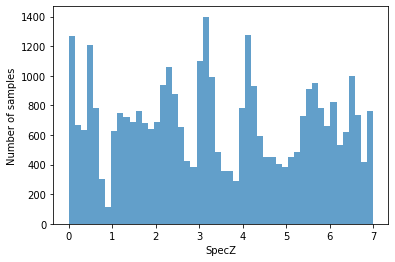

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
dataset['redshift']=np.log1p(dataset['redshift'])

Text(0, 0.5, 'Number of samples')

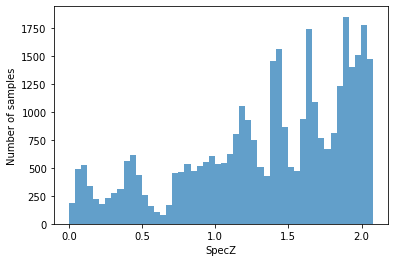

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
X=dataset.drop('redshift',axis=1)
Y=dataset['redshift']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
X.shape

[[0.54466511 0.50488961 0.61698719 ... 0.61911443 0.57650437 0.52158608]
 [0.51007011 0.59149041 0.7374516  ... 0.73694822 0.67972183 0.61469536]
 [0.2336106  0.2647087  0.41218286 ... 0.37455848 0.42364118 0.43238607]
 ...
 [0.60656801 0.56092112 0.70040071 ... 0.63856932 0.61843939 0.57810688]
 [0.37345354 0.45897078 0.72360142 ... 0.56959527 0.66332352 0.70240249]
 [0.55981939 0.57861795 0.69924744 ... 0.68027893 0.622056   0.56805061]]


(35000, 25)

In [ ]:
# Target vector
y = dataset['redshift']
print(y)

298740    0.210210
333195    0.460069
33228     0.016974
20818     0.473781
230252    0.475167
            ...   
597929    2.025273
593895    2.031609
598699    1.992517
589342    2.008150
586897    2.011822
Name: redshift, Length: 35000, dtype: float64


In [ ]:
y=y.to_numpy() #pd needs to convert to numpy before applying minmaxscaler
y=y.reshape(-1,1) # this is for using MinMAxscalerr
print(y.shape)

(35000, 1)


In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
print(y)

[[0.10109011]
 [0.22124794]
 [0.00816258]
 ...
 [0.95820368]
 [0.96572176]
 [0.96748776]]


In [ ]:
#user dfined function for train,test and validation
def my_train_test_split(X, y, ratio_train, ratio_val, seed=42):
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)

    limit_train = int(ratio_train * X.shape[0])
    limit_val = int((ratio_train + ratio_val) * X.shape[0])

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_test_split(X, y, .75,.15,seed=42)

In [ ]:
y_train=y_train.ravel()

In [ ]:
#code for xtratree regressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
import timeit
start = timeit.default_timer()
model = ExtraTreesRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  


Time:  0.29309987398333326 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.6240622562536879
Mean Absolute Error (best is 0.0): 0.09442241008832428
Mean Squared Error (best is 0.0): 0.027047404344297806
R2 score (best is 1.0): 0.6209381345612355
root Mean Squared Error (best is 0.0): 0.16446095081902515


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  30.6 %
Total rms:  0    0.164461
dtype: float64
rms w/o outliers 0    0.0347
dtype: float64
Bias:  0   -0.01493
dtype: float64
Bias(median value of delta z): -6.661338147750939e-16
NMAD:  0.04560566734910639


Text(0, 0.5, 'Predicted')

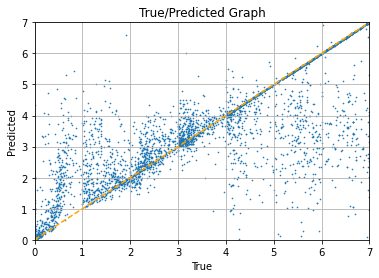

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Random Forest**

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object

import timeit
start = timeit.default_timer()
model = RandomForestRegressor(n_estimators = 50, random_state = 0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  0.67464040905 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.5845585608007695
Mean Absolute Error (best is 0.0): 0.11018637007438753
Mean Squared Error (best is 0.0): 0.029743325885155013
R2 score (best is 1.0): 0.5831555423632775
root Mean Squared Error (best is 0.0): 0.1724625347290101


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  36.08571428571429 %
Total rms:  0    0.172463
dtype: float64
rms w/o outliers 0    0.043089
dtype: float64
Bias:  0   -0.010006
dtype: float64
Bias(median value of delta z): -0.0005584627321683078
NMAD:  0.08350912021272906


Text(0, 0.5, 'Predicted')

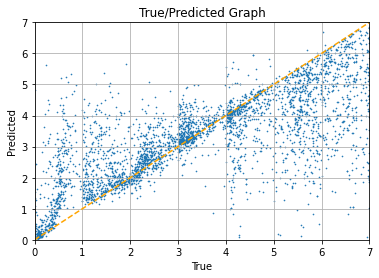

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

import timeit
start = timeit.default_timer()
model =AdaBoostRegressor(random_state=0, n_estimators=50)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  0.049261588683333454 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.29751036783150453
Mean Absolute Error (best is 0.0): 0.18458475029564114
Mean Squared Error (best is 0.0): 0.05015458435056074
R2 score (best is 1.0): 0.2970974196924183
root Mean Squared Error (best is 0.0): 0.22395219210929984


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  65.54285714285714 %
Total rms:  0    0.223952
dtype: float64
rms w/o outliers 0    0.05601
dtype: float64
Bias:  0    0.005428
dtype: float64
Bias(median value of delta z): 0.006903270311434784
NMAD:  0.25514017641401426


Text(0, 0.5, 'Predicted')

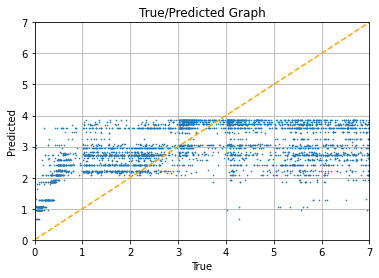

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**XG Boost**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost

import timeit
start = timeit.default_timer()
model = xgboost.XGBRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

[05:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time:  0.41257752435000017 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.45373594220687385
Mean Absolute Error (best is 0.0): 0.14317144082435834
Mean Squared Error (best is 0.0): 0.038983443986652606
R2 score (best is 1.0): 0.4536578515740838
root Mean Squared Error (best is 0.0): 0.19744225481556021


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  50.114285714285714 %
Total rms:  0    0.197442
dtype: float64
rms w/o outliers 0    0.050082
dtype: float64
Bias:  0    0.002361
dtype: float64
Bias(median value of delta z): -0.007172591374168917
NMAD:  0.15113949460208684


Text(0, 0.5, 'Predicted')

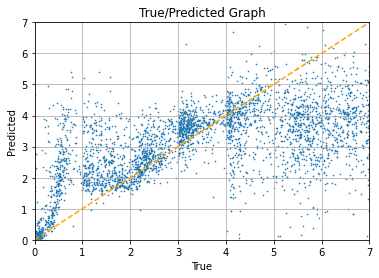

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**CatBoost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor

import timeit
start = timeit.default_timer()
model = CatBoostRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Learning rate set to 0.120542
0:	learn: 0.2582046	total: 113ms	remaining: 56.2s
1:	learn: 0.2493283	total: 152ms	remaining: 37.9s
2:	learn: 0.2418076	total: 201ms	remaining: 33.3s
3:	learn: 0.2358133	total: 257ms	remaining: 31.9s
4:	learn: 0.2307235	total: 280ms	remaining: 27.7s
5:	learn: 0.2264051	total: 297ms	remaining: 24.4s
6:	learn: 0.2232523	total: 314ms	remaining: 22.1s
7:	learn: 0.2205510	total: 357ms	remaining: 22s
8:	learn: 0.2181321	total: 379ms	remaining: 20.7s
9:	learn: 0.2163242	total: 394ms	remaining: 19.3s
10:	learn: 0.2147231	total: 415ms	remaining: 18.4s
11:	learn: 0.2134316	total: 470ms	remaining: 19.1s
12:	learn: 0.2123082	total: 524ms	remaining: 19.6s
13:	learn: 0.2114328	total: 564ms	remaining: 19.6s
14:	learn: 0.2105229	total: 595ms	remaining: 19.2s
15:	learn: 0.2097879	total: 661ms	remaining: 20s
16:	learn: 0.2092377	total: 681ms	remaining: 19.4s
17:	learn: 0.2087624	total: 716ms	remaining: 19.2s
18:	learn: 0.2082317	total: 757ms	remaining: 19.2s
19:	learn: 0.20

In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.4756143370717887
Mean Absolute Error (best is 0.0): 0.13733879263018298
Mean Squared Error (best is 0.0): 0.03742070062720864
R2 score (best is 1.0): 0.4755592660496565
root Mean Squared Error (best is 0.0): 0.19344430885195005


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  48.142857142857146 %
Total rms:  0    0.193444
dtype: float64
rms w/o outliers 0    0.048226
dtype: float64
Bias:  0    0.001982
dtype: float64
Bias(median value of delta z): -0.006412120008340273
NMAD:  0.14032309620832412


Text(0, 0.5, 'Predicted')

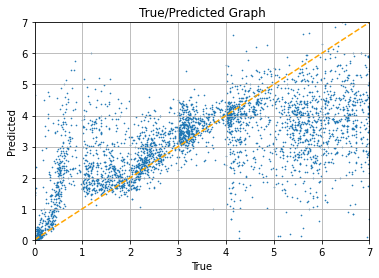

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

import timeit
start = timeit.default_timer()
model = GradientBoostingRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  0.3606865336499998 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.4012539754388643
Mean Absolute Error (best is 0.0): 0.15516892075866195
Mean Squared Error (best is 0.0): 0.04272864996482075
R2 score (best is 1.0): 0.40116982919436406
root Mean Squared Error (best is 0.0): 0.2067090950220158


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  53.457142857142856 %
Total rms:  0    0.206709
dtype: float64
rms w/o outliers 0    0.053182
dtype: float64
Bias:  0    0.00245
dtype: float64
Bias(median value of delta z): -0.008760779310690525
NMAD:  0.1732329320979653


Text(0, 0.5, 'Predicted')

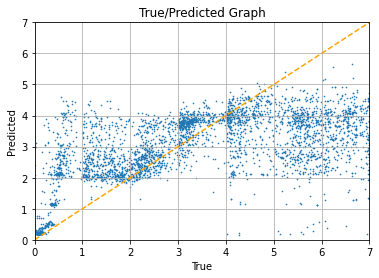

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')